In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import cv2
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print(np.max(X_train[10]))

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
254


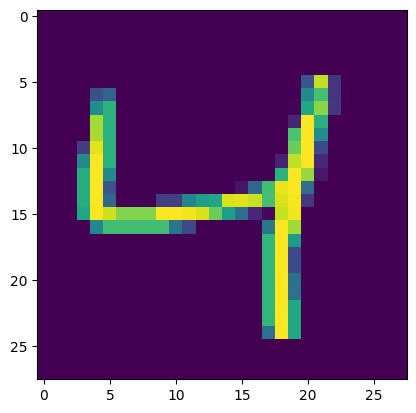

Digit  4


In [4]:
plt.imshow(X_train[2])
plt.show()
print('Digit ',Y_train[2])

#### Labels

In [5]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


###### Normalize the dataset

In [6]:
X_train = X_train/255
X_test = X_test / 255

In [7]:
X_train[0].shape
len(np.unique(Y_train))

10

In [44]:
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(X_train[0].shape)),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(20, activation='relu'),

    keras.layers.Dense(len(np.unique(Y_train)), activation='sigmoid')
])

In [45]:
model.compile(optimizer ='adam',
             loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.fit(X_train, Y_train, validation_split = .1, epochs=5)

Epoch 1/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4250 - accuracy: 0.8733 - val_loss: 0.1742 - val_accuracy: 0.9502
Epoch 2/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1909 - accuracy: 0.9439 - val_loss: 0.1333 - val_accuracy: 0.9592
Epoch 3/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1486 - accuracy: 0.9554 - val_loss: 0.1348 - val_accuracy: 0.9590
Epoch 4/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1236 - accuracy: 0.9625 - val_loss: 0.1169 - val_accuracy: 0.9678
Epoch 5/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1064 - accuracy: 0.9676 - val_loss: 0.1001 - val_accuracy: 0.9710


##### Evaluation

In [47]:
loss, acc = model.evaluate(X_test, Y_test)
print('Test accuray: ',acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1251 - accuracy: 0.9615
Test accuray:  0.9614999890327454


In [48]:
Y_predict = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


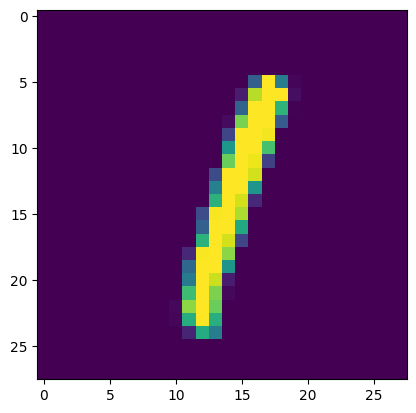

Actual label:  1
Predicted label:  1


In [49]:
plt.imshow(X_test[5])
plt.show()
print('Actual label: ',Y_test[5])
print('Predicted label: ',np.argmax(Y_predict[5]))

In [50]:
Y_predict = [np.argmax(y) for y in Y_predict]

In [51]:
c_m = confusion_matrix(Y_test, Y_predict)
print(c_m)

tf.Tensor(
[[ 968    0    2    2    0    2    1    2    2    1]
 [   0 1119    4    2    0    2    1    3    4    0]
 [  11    3  989    6    4    1    1   10    7    0]
 [   1    0    5  979    1    7    0   10    5    2]
 [   2    0    3    0  953    1    6    2    3   12]
 [   4    3    0   23    2  844    4    2    7    3]
 [  11    2    1    2   10   18  909    0    5    0]
 [   0    6   15    1    1    0    0  995    3    7]
 [   8    3    3   10    3    8    3    9  925    2]
 [   4    6    3   10   23    1    0   22    6  934]], shape=(10, 10), dtype=int32)


Text(0.5, 23.52222222222222, 'Predicted Labels')

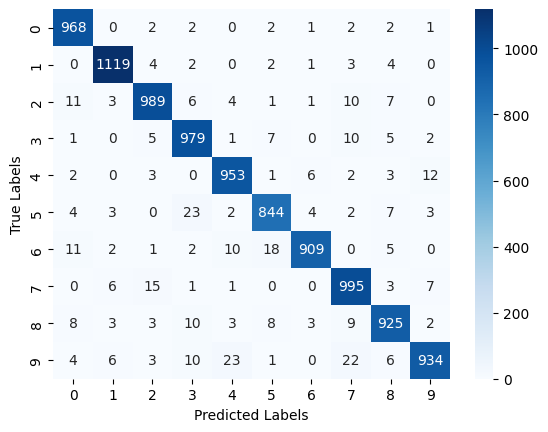

In [52]:
sbn.heatmap(c_m, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

##### A CNN model

In [60]:
X_train = X_train.reshape((-1, 28, 28, 1))  # Reshape to include the channel dimension
X_test = X_test.reshape((-1, 28, 28, 1))

In [61]:
model = keras.Sequential([

    keras.layers.Conv2D(10, kernel_size = 3, strides=2, activation='relu', input_shape=(X_train[0].shape)),
    keras.layers.Conv2D(30, kernel_size = 3, strides=2, activation='relu'),
    keras.layers.Conv2D(20, kernel_size = 3, strides=2, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(len(np.unique(Y_train)), activation='sigmoid')
])

In [62]:
model.compile(optimizer ='adam',
             loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.fit(X_train, Y_train, validation_split = .1, epochs=5)

Epoch 1/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.8011 - accuracy: 0.7460 - val_loss: 0.1290 - val_accuracy: 0.9665
Epoch 2/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3365 - accuracy: 0.9084 - val_loss: 0.0932 - val_accuracy: 0.9740
Epoch 3/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2618 - accuracy: 0.9286 - val_loss: 0.0820 - val_accuracy: 0.9783
Epoch 4/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2179 - accuracy: 0.9414 - val_loss: 0.0802 - val_accuracy: 0.9785
Epoch 5/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2010 - accuracy: 0.9461 - val_loss: 0.0816 - val_accuracy: 0.9778


In [64]:
loss, acc = model.evaluate(X_test, Y_test)
print('CNN test accuray: ',acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0880 - accuracy: 0.9765
CNN test accuray:  0.9764999747276306


In [67]:
Y_predict = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [68]:
Y_predict = [np.argmax(y) for y in Y_predict]

In [69]:
c_m = confusion_matrix(Y_test, Y_predict)
print(c_m)

tf.Tensor(
[[ 967    0    7    0    0    0    4    2    0    0]
 [   0 1119    2    7    0    0    1    0    6    0]
 [   1    1 1019    3    0    0    0    7    1    0]
 [   0    0    4  997    0    1    0    3    5    0]
 [   1    0    4    2  959    0    5    0    4    7]
 [   2    0    0   22    0  864    2    2    0    0]
 [   6    2    2    1    1    6  939    0    1    0]
 [   0    1   24   15    0    0    0  982    2    4]
 [   4    1    1    8    1    3    0    2  951    3]
 [   2    2    2    9    4   14    1    4    3  968]], shape=(10, 10), dtype=int32)


Text(0.5, 23.52222222222222, 'Predicted Labels')

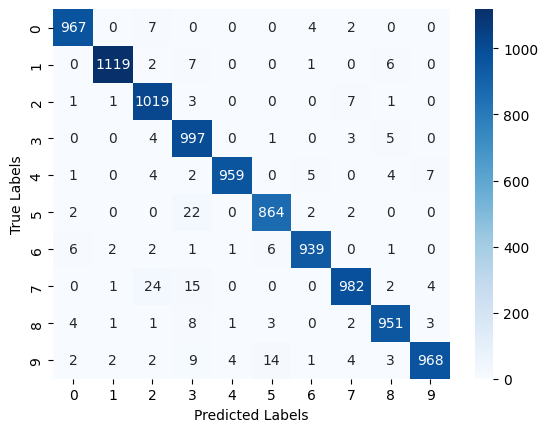

In [70]:
sbn.heatmap(c_m, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')